# Connect to database

## Set credentials

In [1]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

## Establish connection

In [2]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

# Checking if we have consistent datetimes across all sites in 15 min increments e.g., 01/03/19 00:00:00 --> 01/04/20 00:00:00 

## Read in data from database into a dataframe

In [7]:
query="""
    SELECT * 
    FROM agg.t_msb1m  
    WHERE year IN (2019, 2020)
"""

df = pd.read_sql_query(query, conn)

C:\Users\elian\AppData\Local\Temp\ipykernel_102084\511894575.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [8]:
df

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,...,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh
0,2,2019,3,1,0,0,UTC+00:00,0.0,0.0,0.64,...,0.0,34.33,0.0,0.0,0.0,0.0,0.64,33.69,0.0,0.0
1,2,2019,3,1,0,15,UTC+00:00,0.0,0.0,0.77,...,0.0,41.03,0.0,0.0,0.0,0.0,0.77,40.26,0.0,0.0
2,2,2019,3,1,0,30,UTC+00:00,0.0,0.0,0.78,...,0.0,49.23,0.0,0.0,0.0,0.0,0.78,48.45,0.0,0.0
3,2,2019,3,1,0,45,UTC+00:00,0.0,0.0,0.72,...,0.0,48.73,0.0,0.0,0.0,0.0,0.72,48.01,0.0,0.0
4,2,2019,3,1,1,0,UTC+00:00,0.0,0.0,0.66,...,0.0,32.60,0.0,0.0,0.0,0.0,0.66,31.94,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599357,100,2020,3,31,22,45,UTC+01:00,0.0,0.0,3.28,...,0.0,55.34,0.0,0.0,0.0,0.0,3.28,52.06,0.0,0.0
1599358,100,2020,3,31,23,0,UTC+01:00,0.0,0.0,3.26,...,0.0,73.10,0.0,0.0,0.0,0.0,3.26,69.84,0.0,0.0
1599359,100,2020,3,31,23,15,UTC+01:00,0.0,0.0,3.12,...,0.0,63.86,0.0,0.0,0.0,0.0,3.12,60.74,0.0,0.0
1599360,100,2020,3,31,23,30,UTC+01:00,0.0,0.0,3.28,...,0.0,52.70,0.0,0.0,0.0,0.0,3.28,49.42,0.0,0.0


## Create a datetime column

In [9]:
# Got to rename because 'min' messes it up
df.rename(columns={'min': 'minute'}, inplace=True)

df.insert(6, 'datetime', pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']]))

In [10]:
df

,site,year,month,day,hour,minute,datetime,tz,soc,discharge_wh,...,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh
0,2,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.0,...,0.0,34.33,0.0,0.0,0.0,0.0,0.64,33.69,0.0,0.0
1,2,2019,3,1,0,15,2019-03-01 00:15:00,UTC+00:00,0.0,0.0,...,0.0,41.03,0.0,0.0,0.0,0.0,0.77,40.26,0.0,0.0
2,2,2019,3,1,0,30,2019-03-01 00:30:00,UTC+00:00,0.0,0.0,...,0.0,49.23,0.0,0.0,0.0,0.0,0.78,48.45,0.0,0.0
3,2,2019,3,1,0,45,2019-03-01 00:45:00,UTC+00:00,0.0,0.0,...,0.0,48.73,0.0,0.0,0.0,0.0,0.72,48.01,0.0,0.0
4,2,2019,3,1,1,0,2019-03-01 01:00:00,UTC+00:00,0.0,0.0,...,0.0,32.60,0.0,0.0,0.0,0.0,0.66,31.94,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599357,100,2020,3,31,22,45,2020-03-31 22:45:00,UTC+01:00,0.0,0.0,...,0.0,55.34,0.0,0.0,0.0,0.0,3.28,52.06,0.0,0.0
1599358,100,2020,3,31,23,0,2020-03-31 23:00:00,UTC+01:00,0.0,0.0,...,0.0,73.10,0.0,0.0,0.0,0.0,3.26,69.84,0.0,0.0
1599359,100,2020,3,31,23,15,2020-03-31 23:15:00,UTC+01:00,0.0,0.0,...,0.0,63.86,0.0,0.0,0.0,0.0,3.12,60.74,0.0,0.0
1599360,100,2020,3,31,23,30,2020-03-31 23:30:00,UTC+01:00,0.0,0.0,...,0.0,52.70,0.0,0.0,0.0,0.0,3.28,49.42,0.0,0.0


## Create a list of 'true' datetime values to compare against

In [11]:
# Generate a date range from 2019-03-01 00:00:00 to 2020-03-31 23:45:00 in 15 minute increments
datetime_range = pd.date_range(start='2019-03-01 00:00:00', end='2020-03-31 23:45:00', freq='15T')

# Convert the datetime_range to a list
datetime_list = datetime_range.tolist()

datetime_list[:5]

[Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-03-01 00:15:00'),
 Timestamp('2019-03-01 00:30:00'),
 Timestamp('2019-03-01 00:45:00'),
 Timestamp('2019-03-01 01:00:00')]

In [18]:
df['site'].unique()

array([  2,   3,   6,   9,  10,  11,  12,  16,  17,  20,  21,  22,  23,
        25,  28,  29,  30,  31,  33,  34,  36,  39,  41,  42,  46,  49,
        50,  53,  57,  61,  62,  64,  73,  77,  81,  84,  85,  90,  91,
        94,  98, 100], dtype=int64)

## Check for any datetime mismatches

In [27]:
# Initialise a dictionary to record mismatches
mismatches = {}

# Iterate through the site values
for site in df['site'].unique():

    # Filter the dataframe for the current site
    site_df = df[df['site'] == site]
    
    # Convert the 'datetime' column to a datetime object for comparison
    site_datetimes = pd.to_datetime(site_df['datetime'])
    
    # Find mismatches by comparing sets
    mismatch_dates = set(datetime_range) - set(site_datetimes)
    
    # If there are mismatches, add them to the dictionary
    if mismatch_dates:
        mismatches[site] = list(mismatch_dates)

# Convert the mismatches dictionary into a DataFrame for easy viewing and analysis
mismatch_df = pd.DataFrame(list(mismatches.items()), columns=['Site', 'Mismatched Datetimes'])

# This DataFrame now contains the sites and their mismatched datetimes, which you can inspect or save
print(mismatch_df)

    Site                               Mismatched Datetimes
0      2  [2019-12-11 23:15:00, 2020-03-29 01:15:00, 201...
1      3  [2020-03-29 02:30:00, 2020-03-29 01:30:00, 202...
2      6  [2020-01-13 10:00:00, 2019-12-11 20:00:00, 201...
3      9  [2020-02-10 15:15:00, 2020-02-10 11:45:00, 202...
4     10  [2020-03-29 02:30:00, 2020-03-29 01:30:00, 202...
5     11  [2020-02-03 08:00:00, 2019-12-08 12:00:00, 202...
6     12  [2019-03-01 08:45:00, 2020-03-17 08:45:00, 201...
7     16  [2020-03-29 02:30:00, 2020-03-29 01:30:00, 202...
8     17  [2019-07-09 11:00:00, 2020-03-29 01:15:00, 201...
9     20  [2020-03-29 02:30:00, 2020-03-29 01:30:00, 202...
10    21  [2019-03-22 12:30:00, 2020-03-29 01:15:00, 201...
11    22  [2020-03-29 01:15:00, 2019-10-02 11:15:00, 201...
12    23  [2019-07-19 09:15:00, 2019-05-26 08:00:00, 201...
13    25  [2019-12-16 19:45:00, 2019-12-16 15:30:00, 201...
14    28  [2020-02-09 12:45:00, 2020-02-09 20:15:00, 202...
15    29  [2020-03-29 02:30:00, 2020-03-

In [29]:
# Initialise a dictionary to record the count of mismatches
mismatches_count = {}

# Iterate through the site values
for site in df['site'].unique():
    # Filter the dataframe for the current site
    site_df = df[df['site'] == site]
    
    # Convert the 'datetime' column to a datetime object for comparison
    site_datetimes = pd.to_datetime(site_df['datetime'])
    
    # Find mismatches by comparing sets
    mismatch_dates = set(datetime_range) - set(site_datetimes)
    
    # Store the count of mismatches instead of the dates themselves
    mismatches_count[site] = len(mismatch_dates)

# Convert the mismatches_count dictionary into a DataFrame
mismatch_count_df = pd.DataFrame(list(mismatches_count.items()), columns=['Site', 'Number of Mismatches'])

# This DataFrame now contains the sites and the number of their mismatched datetimes
print(mismatch_count_df)

    Site  Number of Mismatches
0      2                    96
1      3                    12
2      6                    56
3      9                    39
4     10                    13
5     11                    26
6     12                    76
7     16                    12
8     17                    31
9     20                    12
10    21                    25
11    22                    29
12    23                    73
13    25                    76
14    28                    61
15    29                    13
16    30                    15
17    31                    90
18    33                    16
19    34                    12
20    36                    12
21    39                    13
22    41                    33
23    42                    14
24    46                    56
25    49                    48
26    50                    12
27    53                    12
28    57                    19
29    61                    12
30    62                    12
31    64

## Visualise the missing datetimes for selected sites

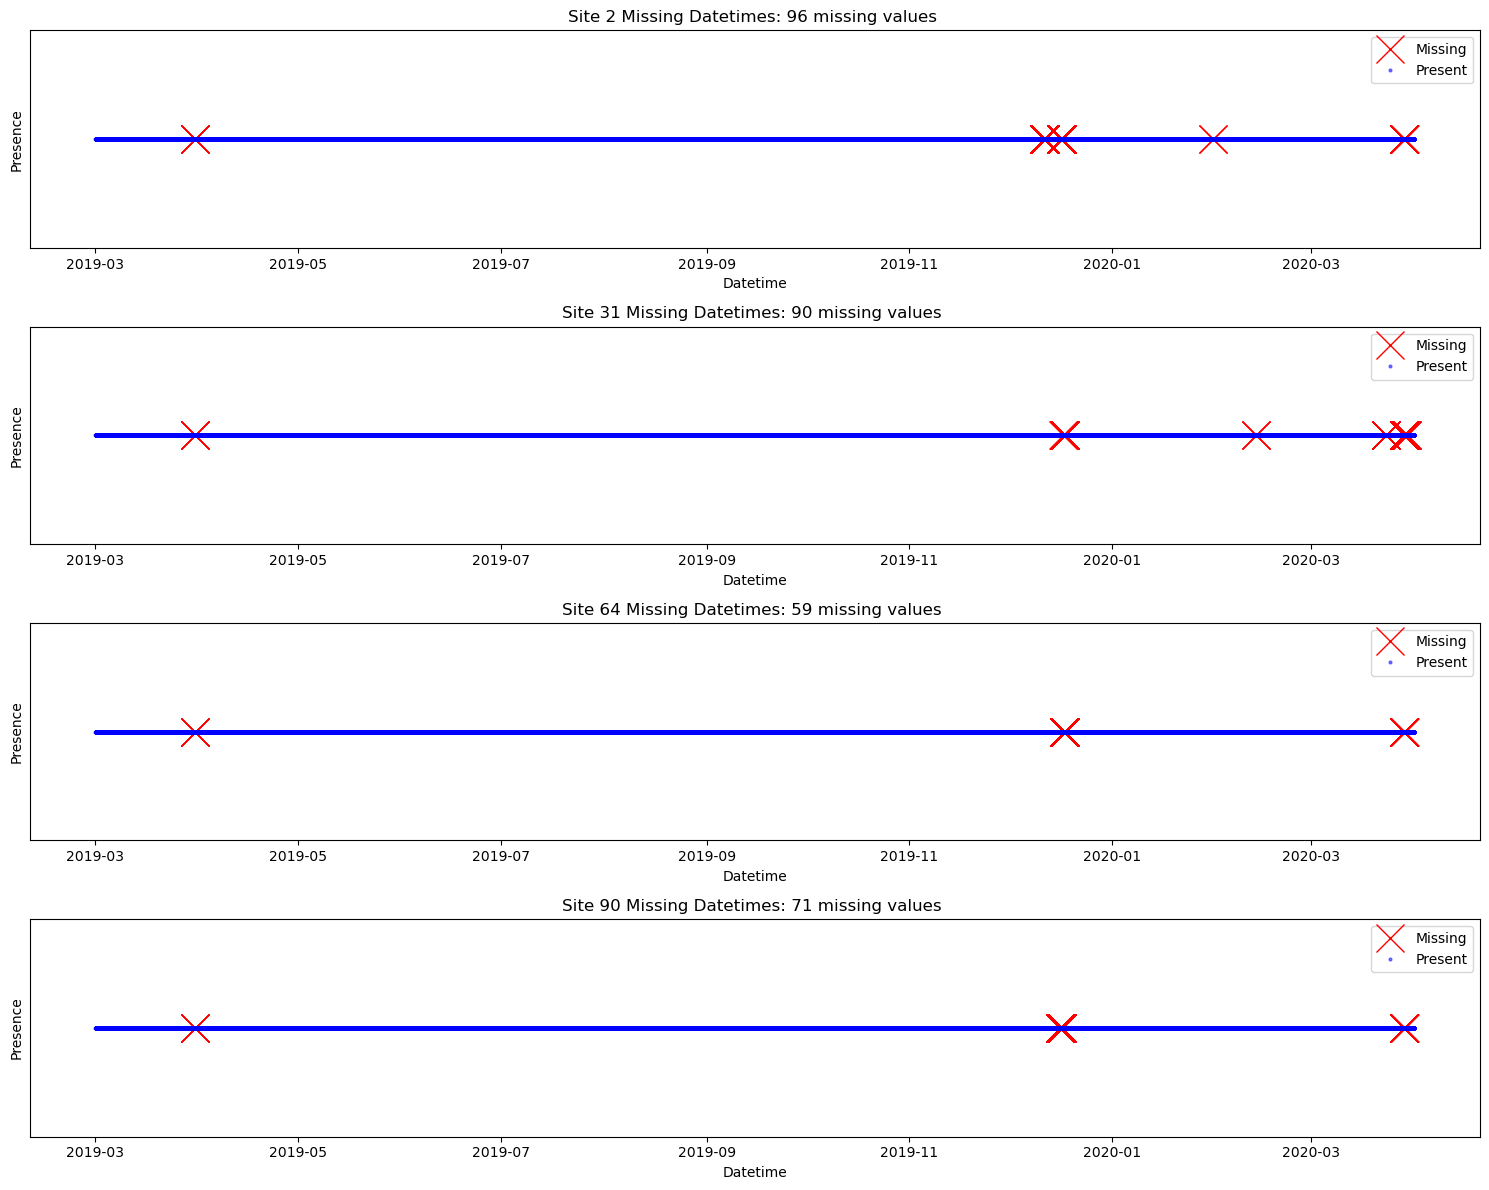

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'datetime_range' is your complete list of datetime values and 'mismatches' contains missing datetimes per site

# Convert 'datetime_range' to a DataFrame for easier handling
datetime_df = pd.DataFrame(datetime_range, columns=['Datetime'])

# Mark all datetimes as not missing initially
datetime_df['IsMissing'] = False

# Select a subset of sites for visualization to keep it readable
selected_sites = [2,31, 64, 90]  # Example: Visualize for sites 2, 3, and 4

# Setup the plot
plt.figure(figsize=(15, 3 * len(selected_sites)))

for index, site in enumerate(selected_sites, start=1):
    plt.subplot(len(selected_sites), 1, index)
    
    # Make a copy of the datetime_df for this site
    site_datetime_df = datetime_df.copy()
    
    # If the site has missing datetimes, mark them in the DataFrame
    if site in mismatches:
        missing_datetimes = mismatches[site]
        site_datetime_df.loc[site_datetime_df['Datetime'].isin(missing_datetimes), 'IsMissing'] = True
    
    # Plot
    plt.plot(site_datetime_df['Datetime'], np.where(site_datetime_df['IsMissing'], 1, np.nan), 'rx', label='Missing', markersize=20)  # Mark missing with red 'x'
    plt.plot(site_datetime_df['Datetime'], np.where(~site_datetime_df['IsMissing'], 1, np.nan), 'bo', label='Present', markersize=2, alpha=0.5)  # Mark present with blue dots

    plt.title(f'Site {site} Missing Datetimes: {mismatches_count[site]} missing values ')
    plt.xlabel('Datetime')
    plt.ylabel('Presence')
    plt.yticks([])  # Hide y-axis ticks as they are not meaningful in this context
    plt.legend()

plt.tight_layout()
plt.show()